# Drug User Prediction

## Importing Libraries

In [110]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans
from sklearn.multioutput import MultiOutputClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import plot_confusion_matrix

## Looking at the Data

In [111]:
data = pd.read_excel('/home/vbgupta/Desktop/School/ds310/inclass2/Drug-User-Prediction/Data.xlsx')
data.head()

,pid,screen1_sleep,screen1_sleep_18_text,screen_voucher,screen2_long,screen3_age,realm_score,consent,consent_agree,pid_20,...,new_helpseek_scale_1,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever
0,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
1,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
2,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
3,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
4,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0


## Preprocessing

In [112]:
# Keeping columns with atleast 75% non-NA values
data = data.dropna(thresh = data.shape[0]*0.75, how = 'all', axis = 1)
data.head()

,pid,screen1_sleep,screen3_age,realm_score,pid_20,pid_30,pid_5_text,city_in,citysite,city_becamehomeless,...,new_helpseek_scale_1,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever
0,1004,15,24.0,7,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
1,1004,15,24.0,7,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
2,1004,15,24.0,7,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
3,1004,15,24.0,7,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
4,1004,15,24.0,7,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0


In [113]:
# Drop duplicates using the `pid` column

data = data.drop_duplicates(subset = 'pid', keep = 'first')
data.head()

,pid,screen1_sleep,screen3_age,realm_score,pid_20,pid_30,pid_5_text,city_in,citysite,city_becamehomeless,...,new_helpseek_scale_1,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever
0,1004,15,24.0,7,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
5,1005,15,19.0,9,7/11/16,Andrea,M0105n,3.0,4,"New Orleans, LA",...,3.0,2.0,2.0,2.0,4.0,1.0,4.0,4.0,22.0,1.0
10,1006,15,22.0,9,7/11/16,Jonah,D0111N,3.0,4,"Denver,CO",...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,1.0
15,1007,15,24.0,9,7/11/16,Andrea,G0409B,3.0,4,"New Orleans, LA",...,4.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,17.0,0.0
20,1008,8,19.0,7,7/13/16,Jonah,T0104D,3.0,3,"Denver, CO",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0


In [114]:
# Retrieving only youths data that are and/or were homeless at some point in their lives

datayouth = data.loc[data['selfhomeless'].notna()]
print(datayouth.shape)
datayouth.head()

(1380, 742)


,pid,screen1_sleep,screen3_age,realm_score,pid_20,pid_30,pid_5_text,city_in,citysite,city_becamehomeless,...,new_helpseek_scale_1,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever
0,1004,15,24.0,7,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
5,1005,15,19.0,9,7/11/16,Andrea,M0105n,3.0,4,"New Orleans, LA",...,3.0,2.0,2.0,2.0,4.0,1.0,4.0,4.0,22.0,1.0
10,1006,15,22.0,9,7/11/16,Jonah,D0111N,3.0,4,"Denver,CO",...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,1.0
15,1007,15,24.0,9,7/11/16,Andrea,G0409B,3.0,4,"New Orleans, LA",...,4.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,17.0,0.0
20,1008,8,19.0,7,7/13/16,Jonah,T0104D,3.0,3,"Denver, CO",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0


In [115]:
# Only using Numeric columns 
datayouth = datayouth.select_dtypes(np.number)
print(datayouth.dtypes)
datayouth.head()

pid                       int64
screen1_sleep             int64
screen3_age             float64
city_in                 float64
citysite                  int64
                         ...   
new_helpseek_scale_6    float64
new_helpseek_scale_7    float64
new_helpseek_scale_8    float64
sum_helpseek_scale      float64
erorhosp_ever           float64
Length: 734, dtype: object


,pid,screen1_sleep,screen3_age,city_in,citysite,birthsex,sexualorientation,ethnic,a12monthhomeless_1,firsthomeless_1,...,new_helpseek_scale_1,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever
0,1004,15,24.0,3.0,4,1.0,4.0,1.0,1.0,19.0,...,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
5,1005,15,19.0,3.0,4,2.0,3.0,2.0,0.0,18.0,...,3.0,2.0,2.0,2.0,4.0,1.0,4.0,4.0,22.0,1.0
10,1006,15,22.0,3.0,4,2.0,3.0,4.0,0.0,21.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,1.0
15,1007,15,24.0,3.0,4,1.0,2.0,2.0,1.0,18.0,...,4.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,17.0,0.0
20,1008,8,19.0,3.0,3,2.0,2.0,2.0,1.0,18.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0


In [116]:
small = datayouth[['druguse_30_1', 'druguse_30_2', 'druguse_30_3', 'druguse_30_4', 'druguse_30_5', 'druguse_30_6']]
small

,druguse_30_1,druguse_30_2,druguse_30_3,druguse_30_4,druguse_30_5,druguse_30_6
0,1.0,1.0,4.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0
10,4.0,3.0,5.0,6.0,3.0,5.0
15,1.0,1.0,1.0,1.0,1.0,1.0
20,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...
6895,1.0,1.0,1.0,1.0,1.0,1.0
6900,1.0,1.0,1.0,1.0,1.0,6.0
6905,1.0,1.0,1.0,1.0,1.0,1.0
6910,1.0,1.0,1.0,1.0,1.0,1.0


In [117]:
# Getting the columns names of the rows with max number -> these are the drug names
small = small.transpose()
drugs  = small.idxmax()
drugs

0       druguse_30_3
5       druguse_30_1
10      druguse_30_4
15      druguse_30_1
20      druguse_30_6
            ...     
6895    druguse_30_1
6900    druguse_30_6
6905    druguse_30_1
6910    druguse_30_1
6915    druguse_30_1
Length: 1380, dtype: object

In [118]:
# Add the drug_id list to the dataframe as the target column
drug = pd.DataFrame(drugs, columns=['drugs'])
drug.head()
drug['drugs'].value_counts()

druguse_30_1    954
druguse_30_6    235
druguse_30_4     86
druguse_30_5     47
druguse_30_3     16
druguse_30_2     12
Name: drugs, dtype: int64

In [119]:
df = pd.concat([datayouth, drug], axis = 1)
df.head()

,pid,screen1_sleep,screen3_age,city_in,citysite,birthsex,sexualorientation,ethnic,a12monthhomeless_1,firsthomeless_1,...,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever,drugs
0,1004,15,24.0,3.0,4,1.0,4.0,1.0,1.0,19.0,...,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0,druguse_30_3
5,1005,15,19.0,3.0,4,2.0,3.0,2.0,0.0,18.0,...,2.0,2.0,2.0,4.0,1.0,4.0,4.0,22.0,1.0,druguse_30_1
10,1006,15,22.0,3.0,4,2.0,3.0,4.0,0.0,21.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,1.0,druguse_30_4
15,1007,15,24.0,3.0,4,1.0,2.0,2.0,1.0,18.0,...,1.0,1.0,1.0,4.0,1.0,4.0,1.0,17.0,0.0,druguse_30_1
20,1008,8,19.0,3.0,3,2.0,2.0,2.0,1.0,18.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,druguse_30_6


In [120]:
# Dropping columns that created the target `drug` column and those that are highly related

df = df.drop(['druguse_30_1', 'druguse_30_2', 'druguse_30_3', 'druguse_30_4', 'druguse_30_5', 'druguse_30_6', 'smoke_2', 'alc_30', 'marj_30', 'rx_30', 'inject_30', 'cocaine', 'crack', 
'heroin', 'meth', 'ecstasy', 'spice', 'pot40'], axis = 1)
df.head()

,pid,screen1_sleep,screen3_age,city_in,citysite,birthsex,sexualorientation,ethnic,a12monthhomeless_1,firsthomeless_1,...,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever,drugs
0,1004,15,24.0,3.0,4,1.0,4.0,1.0,1.0,19.0,...,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0,druguse_30_3
5,1005,15,19.0,3.0,4,2.0,3.0,2.0,0.0,18.0,...,2.0,2.0,2.0,4.0,1.0,4.0,4.0,22.0,1.0,druguse_30_1
10,1006,15,22.0,3.0,4,2.0,3.0,4.0,0.0,21.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,1.0,druguse_30_4
15,1007,15,24.0,3.0,4,1.0,2.0,2.0,1.0,18.0,...,1.0,1.0,1.0,4.0,1.0,4.0,1.0,17.0,0.0,druguse_30_1
20,1008,8,19.0,3.0,3,2.0,2.0,2.0,1.0,18.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,druguse_30_6


In [121]:
# Label Encoding the target column

le = LabelEncoder()
df['drugs'] = le.fit_transform(df['drugs'])
df.head()

,pid,screen1_sleep,screen3_age,city_in,citysite,birthsex,sexualorientation,ethnic,a12monthhomeless_1,firsthomeless_1,...,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever,drugs
0,1004,15,24.0,3.0,4,1.0,4.0,1.0,1.0,19.0,...,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0,2
5,1005,15,19.0,3.0,4,2.0,3.0,2.0,0.0,18.0,...,2.0,2.0,2.0,4.0,1.0,4.0,4.0,22.0,1.0,0
10,1006,15,22.0,3.0,4,2.0,3.0,4.0,0.0,21.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,1.0,3
15,1007,15,24.0,3.0,4,1.0,2.0,2.0,1.0,18.0,...,1.0,1.0,1.0,4.0,1.0,4.0,1.0,17.0,0.0,0
20,1008,8,19.0,3.0,3,2.0,2.0,2.0,1.0,18.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,5


In [122]:
# Checking for missing values in the datase `df`
print('-- Missing Values in the Dataset --')
print(df.isna().sum())
print(df.shape)


-- Missing Values in the Dataset --
pid                      0
screen1_sleep            0
screen3_age              3
city_in                  2
citysite                 0
                        ..
new_helpseek_scale_7    44
new_helpseek_scale_8    42
sum_helpseek_scale      51
erorhosp_ever           16
drugs                    0
Length: 717, dtype: int64
(1380, 717)


In [123]:
# Splitting the data in X, y's training and testing
X = df.drop('drugs', axis = 1)
y = df['drugs']

# Imputing data using simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
impX = pd.DataFrame(imputer.fit_transform(X))
impX.columns = X.columns
impX.index = X.index

# Split = 70/30
X_train, X_test, y_train, y_test = train_test_split(impX,y, test_size=0.3) 


### Lets look at the weights of the target column

-- Number of records --
1380
-- Number of records per class --
0    954
5    235
3     86
4     47
6     30
2     16
1     12
Name: drugs, dtype: int64


<AxesSubplot:>

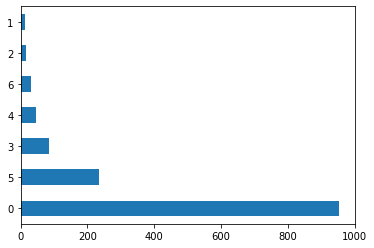

In [124]:
print('-- Number of records --')
print(len(df))
print('-- Number of records per class --')
print(df.drugs.value_counts())
df.drugs.value_counts().plot.barh()

**This dataset is heavily skewed towards a particular **


In order to make sure we are learning on skewed data we are going to manually add weights to the model:

Formula:

Weight_of_a_specific_class = [ (total_num_samples)/ (total_number_classes * num_samples_of_specific_class) ]


With the above formula:

* 0 = 0.2066
* 1 = 0.8389
* 2 = 2.2924
* 3 = 4.1945
* 4 = 6.5714
* 5 = 12.3214
* 6 = 16.4286

### We will be implementing the following algorithms for MultiLabel Classification:

1. DecisionTreeClassifier:

Decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split.

Reference: https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

**The class_weight parameter for all algorithms will be:**

In [125]:
class_weight={0: 0.2066, 1: 0.8389, 2: 2.2924, 3: 4.1945, 4: 6.5714,
5: 12.3214, 6: 16.4286}

-- DTC Baseline Confusion Matrix --
[[259   1   2  11   7   8   8]
 [  1   0   0   1   1   3   0]
 [  3   0   0   1   0   0   0]
 [ 10   0   2   5   2   2   0]
 [  3   0   2   4   2   3   0]
 [  5   0   0  10   1  45   0]
 [  8   0   0   0   0   0   4]]
-- DTC Baseline Classification Report --
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       296
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.05      0.05      0.05        21
           4       0.00      0.00      0.00        14
           5       0.21      0.30      0.24        61
           6       0.09      0.08      0.09        12

    accuracy                           0.50       414
   macro avg       0.15      0.15      0.15       414
weighted avg       0.54      0.50      0.52       414

-- Plot Confusion Matrix --


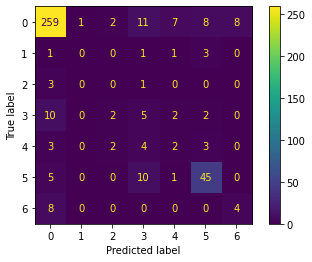

In [126]:
# Decision Tree Classifier

dtc = DecisionTreeClassifier(class_weight = class_weight, random_state = 44)
dtc.fit(X_train, y_train)
y_preds_dtc = dtc.predict(X_test)

# Confusion Matrix:

print('-- DTC Baseline Confusion Matrix --')
print(confusion_matrix(y_test, y_preds_dtc))

print('-- DTC Baseline Classification Report --')
print(classification_report(y_test, y_preds_grid))


print('-- Plot Confusion Matrix --')
plot_confusion_matrix(dtc, X_test, y_test)

### Improve on DecisionTreeClassifier

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
/home/vbgupta/Desktop/School/ds310/school_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/vbgupta/Desktop/School/ds310/school_env/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.19873282 0.19873282 0.19873282 0.19873282 0.19873282
 0.19873282 0.19873282 0.19873282        nan 0.19873282 0.19873282
 0.19873282 0.19873282 0.19873282 0.19873282 0.19873282 0.19873282
        nan 0.19873282 0.19873282 0.19873282 0.19873282 0.19873282
 0.19873282 0.19873282 0.19873282        nan 0.19873282 0.19873282
 0.19873282 0.19873282 0.19873282 0.19873282 0.19873282 0.19873282
        nan 0.39547895 0.39547895 0.39547895 0.39547895 0.39547895
 0.39547895 0.3954789

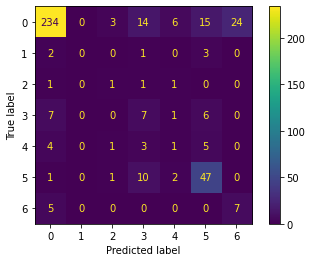

In [127]:
param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5)
}

grid = GridSearchCV(DecisionTreeClassifier(class_weight = class_weight, random_state=44), param_grid=param_dict,
cv = 10, verbose = 1, n_jobs = -1, refit= True)

grid.fit(X_train, y_train)

y_preds_grid = grid.predict(X_test)

print("Best Grid Params:", grid.best_params_)

print(confusion_matrix(y_test, y_preds_grid))

plot_confusion_matrix(grid, X_test, y_test)

### Measure Score AUC 

In [128]:
# Classification Report
print(classification_report(y_test, y_preds_grid))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       296
           1       0.00      0.00      0.00         6
           2       0.17      0.25      0.20         4
           3       0.19      0.33      0.25        21
           4       0.09      0.07      0.08        14
           5       0.62      0.77      0.69        61
           6       0.23      0.58      0.33        12

    accuracy                           0.72       414
   macro avg       0.32      0.40      0.34       414
weighted avg       0.77      0.72      0.74       414

/home/vbgupta/Desktop/School/ds310/school_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vbgupta/Desktop/School/ds310/school_env/lib/python3

In [129]:
# AUC Score

def multiclass_roc_auc_score(y_test, y_preds_grid, average="macro"):

    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_preds_grid = lb.transform(y_preds_grid)
    return roc_auc_score(y_test, y_preds_grid, average=average)

In [130]:
np.random.seed(44)
multiclass_roc_auc_score(y_test, y_preds_grid, average= "macro")

0.6697710799212462